# Q1) Extract reviews of any product from ecommerce website like amazon

In [10]:
!pip install autoscraper

In [12]:
from autoscraper import AutoScraper

In [15]:
amazon_url = "https://www.amazon.in/Ambrane-20000mAh-Lithium-Polymer-Stylo-20K/product-reviews/B07RD611Z8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

wanted_list = ["Kumar VSN Vedantham","Reliable power bank"]



In [16]:
scraper = AutoScraper()
result = scraper.build(amazon_url,wanted_list)
print(result)

['Param Kharbanda', 'Amazon Customer', 'ASWINI KUMAR M', 'Kumar VSN Vedantham', 'sahil mukkawar', 'Gaurav', 'manish', 'RAKESH PANARA', '⚡ Pushpendra Singh Patel ⚡', 'Tanishk B.', 'VERY DEPENDABLE...NOT THAT PORTABLE!', 'Colour: Green', 'Power efficiency', 'Colour: Black', 'Good', 'Reliable power bank', 'Good Product', 'Colour: Blue', 'This is the second power bank from Ambrane India, i am happy', 'Good back up power storage capacity', 'Good Quality & Durable Powerbank in 1k range | Review', 'Feels Heavy']


In [18]:
scraper.get_result_similar(amazon_url,grouped=True)


{'rule_xvto': ['Param Kharbanda',
  'Amazon Customer',
  'ASWINI KUMAR M',
  'Kumar VSN Vedantham',
  'sahil mukkawar',
  'Gaurav',
  'manish',
  'RAKESH PANARA',
  '⚡ Pushpendra Singh Patel ⚡',
  'Tanishk B.'],
 'rule_airr': ['VERY DEPENDABLE...NOT THAT PORTABLE!',
  'Colour: Green',
  'Power efficiency',
  'Colour: Black',
  'Good',
  'Colour: Black',
  'Reliable power bank',
  'Colour: Green',
  'Good Product',
  'Colour: Blue',
  'This is the second power bank from Ambrane India, i am happy',
  'Colour: Black',
  'Good',
  'Colour: Green',
  'Good back up power storage capacity',
  'Colour: Blue',
  'Good Quality & Durable Powerbank in 1k range | Review',
  'Colour: Black',
  'Feels Heavy',
  'Colour: Black']}

In [20]:
scraper.set_rule_aliases({"rule_airr":"Review"})
scraper.keep_rules(["rule_airr"])
scraper.save("amazon-search")

In [23]:
results = scraper.get_result_similar("https://www.amazon.in/Ambrane-20000mAh-Lithium-Polymer-Stylo-20K/product-reviews/B07RD611Z8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews",group_by_alias=True)
results["Review"]

['VERY DEPENDABLE...NOT THAT PORTABLE!',
 'Colour: Green',
 'Power efficiency',
 'Colour: Black',
 'Good',
 'Colour: Black',
 'Reliable power bank',
 'Colour: Green',
 'Good Product',
 'Colour: Blue',
 'This is the second power bank from Ambrane India, i am happy',
 'Colour: Black',
 'Good',
 'Colour: Green',
 'Good back up power storage capacity',
 'Colour: Blue',
 'Good Quality & Durable Powerbank in 1k range | Review',
 'Colour: Black',
 'Feels Heavy',
 'Colour: Black']

In [25]:
import pandas as pd

In [26]:
afinn = pd.read_csv("C:\\Users\\Anks\\Downloads\\Afinn.csv", sep=",", encoding="latin-1")
afinn.shape

(2477, 2)

In [27]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [33]:
data = results["Review"]


In [37]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anks\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences

['VERY DEPENDABLE...NOT THAT PORTABLE!',
 'Colour: Green Power efficiency Colour: Black Good Colour: Black Reliable power bank Colour: Green Good Product Colour: Blue This is the second power bank from Ambrane India, i am happy Colour: Black Good Colour: Green Good back up power storage capacity Colour: Blue Good Quality & Durable Powerbank in 1k range | Review Colour: Black Feels Heavy Colour: Black']

In [39]:
review_df = pd.DataFrame(sentences, columns=["review_comments"])
review_df

,review_comments
0,VERY DEPENDABLE...NOT THAT PORTABLE!
1,Colour: Green Power efficiency Colour: Black G...


In [40]:
affinity_score = afinn.set_index("word")["value"].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [41]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
    sent_score=0
    if text :
        sentence = nlp(text)
        for word in sentence:
             sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

calculate_sentiment(text = "amazing")


4

In [42]:
review_df["sentiment_value"] = review_df["review_comments"].apply(calculate_sentiment)
# How many words are in the sentences?



In [43]:
review_df["word_count"] = review_df["review_comments"].str.split().apply(len)
review_df["word_count"].head(10)

0     4
1    59
Name: word_count, dtype: int64

In [44]:
review_df.sort_values(by="sentiment_value").tail(10)

,review_comments,sentiment_value,word_count
0,VERY DEPENDABLE...NOT THAT PORTABLE!,0,4
1,Colour: Green Power efficiency Colour: Black G...,9,59


In [46]:
# Sentiment score of the whole review
review_df['sentiment_value'].describe()

count    2.000000
mean     4.500000
std      6.363961
min      0.000000
25%      2.250000
50%      4.500000
75%      6.750000
max      9.000000
Name: sentiment_value, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

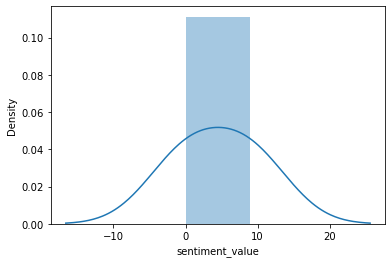

In [47]:
import seaborn as sns
sns.distplot(review_df["sentiment_value"])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

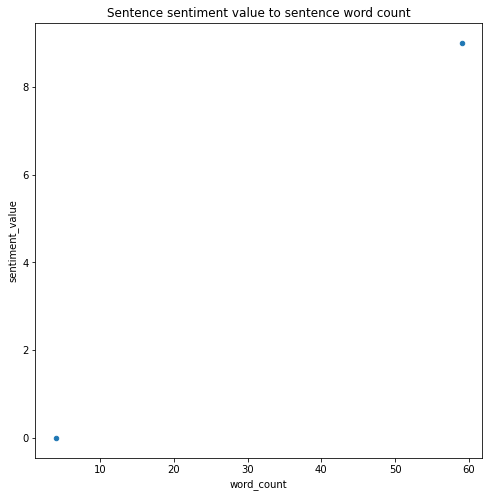

In [48]:
review_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')


In [49]:
review_df

,review_comments,sentiment_value,word_count
0,VERY DEPENDABLE...NOT THAT PORTABLE!,0,4
1,Colour: Green Power efficiency Colour: Black G...,9,59
